In [109]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import mutual_info_score, classification_report
from sklearn.model_selection import train_test_split

In [82]:
# Import all .csvs into a pandas data frame
df_charges = pd.read_csv('./data/charges_data.csv')
df_personal = pd.read_csv('./data/personal_data.csv')
df_plan = pd.read_csv('./data/plan_data.csv')

In [83]:
# Sanity checkpoint
df_charges.columns

Index(['customerID', 'tenure', 'contract', 'paperlessBilling', 'paymentMethod',
       'monthlyCharges', 'totalCharges', 'churn'],
      dtype='object')

In [84]:
# Sanity checkpoint
df_personal.columns

Index(['customerID', 'gender', 'partner', 'dependents', 'age'], dtype='object')

In [85]:
# Sanity checkpoint
df_plan.columns

Index(['customerID', 'phoneService', 'multipleLines', 'internetService',
       'onlineSecurity', 'onlineBackup', 'deviceProtection', 'techSupport',
       'streamingTV', 'streamingMovies'],
      dtype='object')

In [86]:
# Inner join the columns using 'customerID' as the primary key

df_temp = df_personal.merge(df_charges, on='customerID')
df_all = df_temp.merge(df_plan, on='customerID')

# Sanity checkpoint
df_all.columns

Index(['customerID', 'gender', 'partner', 'dependents', 'age', 'tenure',
       'contract', 'paperlessBilling', 'paymentMethod', 'monthlyCharges',
       'totalCharges', 'churn', 'phoneService', 'multipleLines',
       'internetService', 'onlineSecurity', 'onlineBackup', 'deviceProtection',
       'techSupport', 'streamingTV', 'streamingMovies'],
      dtype='object')

# Exploratory Data Analysis and Data Cleaning

In [87]:
# Check unique values of each column

for column in df_all.columns:
    print('Column: {} - Unique Values: {}'.format(column, df_all[column].unique()))

Column: customerID - Unique Values: ['5575-GNVDE' '7795-CFOCW' '9237-HQITU' ... '2569-WGERO' '2234-XADUH'
 '3186-AJIEK']
Column: gender - Unique Values: ['Male' 'Female']
Column: partner - Unique Values: ['No' 'Yes']
Column: dependents - Unique Values: ['No' 'Yes']
Column: age - Unique Values: [41 61 66 39 38 50 47 60 46 64 32 26 88 75 65 29 81 48 27 82 59 83 49 30
 79 52 74 55 21 90 22 36 23 31 62 89 43 80 72 51 78 53 35 42 70 37 25 86
 24 67 87 57 34 85 44 40 71 76 20 28 73 63 54 84 68 77 56 45 58 69 33]
Column: tenure - Unique Values: [34 45  2 22 10 28 62 13 16 58 49 25 69 52 71 21  1 17  5 46 11 70 43  8
 60 63 66 72  3 47 35 48 29 30 12 68 32 55 37 64 36 41 56  6  4 33 27 67
 61 14 20 53 15 24 19 23 31 18 65 42 57 38 54  9  7 44 51 40 39 50 26 59]
Column: contract - Unique Values: ['One year' 'Month-to-month' 'Two year']
Column: paperlessBilling - Unique Values: ['No' 'Yes']
Column: paymentMethod - Unique Values: ['Mailed check' 'Bank transfer (automatic)' 'Electronic check'
 'Cr

In [88]:
# Summary of the data frame

df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3537 entries, 0 to 3536
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3537 non-null   object 
 1   gender            3537 non-null   object 
 2   partner           3537 non-null   object 
 3   dependents        3537 non-null   object 
 4   age               3537 non-null   int64  
 5   tenure            3537 non-null   int64  
 6   contract          3537 non-null   object 
 7   paperlessBilling  3537 non-null   object 
 8   paymentMethod     3537 non-null   object 
 9   monthlyCharges    3303 non-null   float64
 10  totalCharges      3303 non-null   float64
 11  churn             3537 non-null   object 
 12  phoneService      3537 non-null   object 
 13  multipleLines     3537 non-null   object 
 14  internetService   3537 non-null   object 
 15  onlineSecurity    3537 non-null   object 
 16  onlineBackup      3537 non-null   object 


In [89]:
df_all.isnull().sum()

customerID            0
gender                0
partner               0
dependents            0
age                   0
tenure                0
contract              0
paperlessBilling      0
paymentMethod         0
monthlyCharges      234
totalCharges        234
churn                 0
phoneService          0
multipleLines         0
internetService       0
onlineSecurity        0
onlineBackup          0
deviceProtection      0
techSupport           0
streamingTV           0
streamingMovies       0
dtype: int64

In [90]:
# Drop observations with null values

df_all.dropna(inplace=True)

# Summary of the data frame after dropping rows with NA value

df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3303 entries, 0 to 3536
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3303 non-null   object 
 1   gender            3303 non-null   object 
 2   partner           3303 non-null   object 
 3   dependents        3303 non-null   object 
 4   age               3303 non-null   int64  
 5   tenure            3303 non-null   int64  
 6   contract          3303 non-null   object 
 7   paperlessBilling  3303 non-null   object 
 8   paymentMethod     3303 non-null   object 
 9   monthlyCharges    3303 non-null   float64
 10  totalCharges      3303 non-null   float64
 11  churn             3303 non-null   object 
 12  phoneService      3303 non-null   object 
 13  multipleLines     3303 non-null   object 
 14  internetService   3303 non-null   object 
 15  onlineSecurity    3303 non-null   object 
 16  onlineBackup      3303 non-null   object 


In [91]:
# Drop the customerID column from the dataset since has no effect on the prediction

df_all.drop(columns='customerID', inplace=True)

# Sanity Checkpoint
df_all.columns

Index(['gender', 'partner', 'dependents', 'age', 'tenure', 'contract',
       'paperlessBilling', 'paymentMethod', 'monthlyCharges', 'totalCharges',
       'churn', 'phoneService', 'multipleLines', 'internetService',
       'onlineSecurity', 'onlineBackup', 'deviceProtection', 'techSupport',
       'streamingTV', 'streamingMovies'],
      dtype='object')

# Data Visualisation (add more here if got enough time)

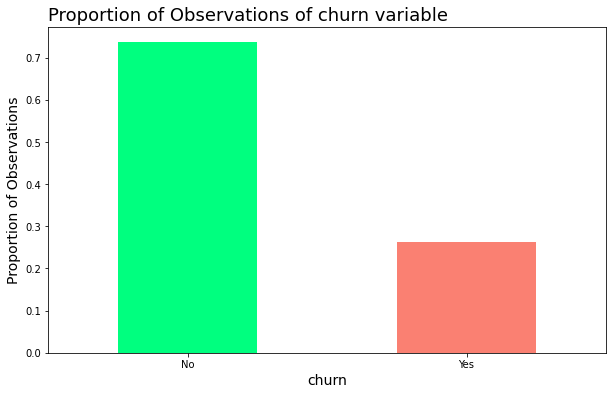

In [92]:
# Create a figure
fig = plt.figure(figsize=(10, 6)) 
ax = fig.add_subplot(111)

# proportion of observation of each class
prop_churn = df_all['churn'].value_counts(normalize=True)

# create a bar plot showing the percentage of churn
prop_churn.plot(kind='bar', 
                ax=ax,
                color=['springgreen','salmon'])

# set title and labels
ax.set_title('Proportion of Observations of churn variable',
             fontsize=18, loc='left')
ax.set_xlabel('churn',
              fontsize=14)
ax.set_ylabel('Proportion of Observations',
              fontsize=14)
ax.tick_params(rotation='auto')

# We can see that the dataset is imbalance.

# Feature Engineering

In [93]:
# Function that computes the mutual infomation score between a categorical serie and the column churn
def compute_mutual_information(categorical_serie):
    return mutual_info_score(categorical_serie, df_all.churn)

# select categorial variables excluding the response variable 
categorical_variables = df_all.select_dtypes(include=object).drop('churn', axis=1)

# compute the mutual information score between each categorical variable and the target
feature_importance = categorical_variables.apply(compute_mutual_information).sort_values(ascending=False)

# visualize feature importance
print(feature_importance)

contract            1.022546e-01
onlineSecurity      6.591703e-02
techSupport         6.429724e-02
internetService     5.399078e-02
paymentMethod       4.981465e-02
onlineBackup        4.762522e-02
deviceProtection    4.473817e-02
streamingMovies     3.241752e-02
streamingTV         3.163978e-02
paperlessBilling    2.481206e-02
partner             1.207175e-02
dependents          1.123352e-02
multipleLines       2.485330e-03
phoneService        1.882629e-04
gender              7.186630e-09
dtype: float64


In [94]:
# From above, we see that 'multipleLines', 'phoneService', and 'gender' have very low mutual information score. 
# This means that these variables do not have a strong relationship with the churn. As a result, we can remove them 
# from the dataset.

df_all = df_all.drop('multipleLines', axis=1)
df_all = df_all.drop('phoneService', axis=1)
df_all = df_all.drop('gender', axis=1)

# Sanity Checkpoint
df_all.columns

Index(['partner', 'dependents', 'age', 'tenure', 'contract',
       'paperlessBilling', 'paymentMethod', 'monthlyCharges', 'totalCharges',
       'churn', 'internetService', 'onlineSecurity', 'onlineBackup',
       'deviceProtection', 'techSupport', 'streamingTV', 'streamingMovies'],
      dtype='object')

In [95]:
# Do label encoding for binary value columns

df_all_transformed = df_all.copy()

binary_label_encoding_columns = ['partner', 'dependents', 'paperlessBilling', 'churn']
# recall that 'phoneService' and 'gender' are removed

# Encode categorical binary column features using label encoding
for column in binary_label_encoding_columns: 
    df_all_transformed[column] = df_all_transformed[column].map({'Yes': 1, 'No': 0})
        
# Sanity Checkpoint
df_all_transformed.head

<bound method NDFrame.head of       partner  dependents  age  tenure        contract  paperlessBilling  \
0           0           0   41      34        One year                 0   
1           0           0   61      45        One year                 0   
2           0           0   66       2  Month-to-month                 1   
3           0           1   39      22  Month-to-month                 1   
4           0           0   39      10  Month-to-month                 0   
...       ...         ...  ...     ...             ...               ...   
3531        1           0   25      55        One year                 0   
3532        0           0   46       1  Month-to-month                 1   
3533        0           0   24      19  Month-to-month                 1   
3534        0           0   33      72        Two year                 1   
3536        0           0   36      66        Two year                 1   

                  paymentMethod  monthlyCharges  totalCha

In [96]:
# Do one-hot encoding for binary value columns

one_hot_encoding_columns = ['contract', 'paymentMethod', 'internetService', 'onlineSecurity', 
                            'onlineBackup', 'deviceProtection', 'techSupport', 'streamingTV',  
                            'streamingMovies']

# Encode the rest of the categorical variables using one-hot encoding
df_all_transformed = pd.get_dummies(df_all_transformed, columns = one_hot_encoding_columns)

# Sanity Checkpoint
df_all_transformed.head

<bound method NDFrame.head of       partner  dependents  age  tenure  paperlessBilling  monthlyCharges  \
0           0           0   41      34                 0           56.95   
1           0           0   61      45                 0           42.30   
2           0           0   66       2                 1           70.70   
3           0           1   39      22                 1           89.10   
4           0           0   39      10                 0           29.75   
...       ...         ...  ...     ...               ...             ...   
3531        1           0   25      55                 0           60.00   
3532        0           0   46       1                 1           75.75   
3533        0           0   24      19                 1           78.70   
3534        0           0   33      72                 1           21.15   
3536        0           0   36      66                 1          105.65   

      totalCharges  churn  contract_Month-to-month  contr

In [97]:
# Data normalization for numeric variables
numeric_columns = ['age', 'tenure', 'monthlyCharges', 'totalCharges']

# Use min-max scaler
for column in numeric_columns:
        min_column = df_all_transformed[column].min()
        max_column = df_all_transformed[column].max()
        df_all_transformed[column] = (df_all_transformed[column] - min_column) / (max_column - min_column)   

# Sanity Checkpoint
df_all_transformed.head

<bound method NDFrame.head of       partner  dependents       age    tenure  paperlessBilling  \
0           0           0  0.300000  0.464789                 0   
1           0           0  0.585714  0.619718                 0   
2           0           0  0.657143  0.014085                 1   
3           0           1  0.271429  0.295775                 1   
4           0           0  0.271429  0.126761                 0   
...       ...         ...       ...       ...               ...   
3531        1           0  0.071429  0.760563                 0   
3532        0           0  0.371429  0.000000                 1   
3533        0           0  0.057143  0.253521                 1   
3534        0           0  0.185714  1.000000                 1   
3536        0           0  0.228571  0.915493                 1   

      monthlyCharges  totalCharges  churn  contract_Month-to-month  \
0           0.385075      0.216175      0                        0   
1           0.239303     

# Model Learning

In [98]:
# Features
x = df_all_transformed.drop(columns='churn')

# Labels
y = df_all_transformed.loc[:, 'churn']

# Sanity Checkpoint
print(x.columns)

# Sanity Checkpoint
print(y.name)

Index(['partner', 'dependents', 'age', 'tenure', 'paperlessBilling',
       'monthlyCharges', 'totalCharges', 'contract_Month-to-month',
       'contract_One year', 'contract_Two year',
       'paymentMethod_Bank transfer (automatic)',
       'paymentMethod_Credit card (automatic)',
       'paymentMethod_Electronic check', 'paymentMethod_Mailed check',
       'internetService_DSL', 'internetService_Fiber optic',
       'internetService_No', 'onlineSecurity_No',
       'onlineSecurity_No internet service', 'onlineSecurity_Yes',
       'onlineBackup_No', 'onlineBackup_No internet service',
       'onlineBackup_Yes', 'deviceProtection_No',
       'deviceProtection_No internet service', 'deviceProtection_Yes',
       'techSupport_No', 'techSupport_No internet service', 'techSupport_Yes',
       'streamingTV_No', 'streamingTV_No internet service', 'streamingTV_Yes',
       'streamingMovies_No', 'streamingMovies_No internet service',
       'streamingMovies_Yes'],
      dtype='object')
churn

In [102]:
# Split the data in training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=69)

In [113]:
# Create and train Logistic Regression model
from sklearn.linear_model import LogisticRegression

model_LR = LogisticRegression()
model_LR.fit(x_train, y_train)

accuracy = model_LR.score(x_test, y_test)
print('Accuracy: ', accuracy)

# Model evaluation
print('\n')
print(classification_report(y_test, model_LR.predict(x_test)))

Accuracy:  0.8048411497730711


              precision    recall  f1-score   support

           0       0.84      0.91      0.87       489
           1       0.66      0.52      0.58       172

    accuracy                           0.80       661
   macro avg       0.75      0.71      0.73       661
weighted avg       0.79      0.80      0.80       661



In [114]:
# Create and train Random Forest Classifier model
from sklearn.ensemble import RandomForestClassifier

model_RFC = RandomForestClassifier()
model_RFC.fit(x_train, y_train)

accuracy = model_RFC.score(x_test, y_test)
print('Accuracy: ', accuracy)

# Model evaluation
print('\n')
print(classification_report(y_test, model_RFC.predict(x_test)))

Accuracy:  0.8033282904689864


              precision    recall  f1-score   support

           0       0.84      0.91      0.87       489
           1       0.66      0.51      0.57       172

    accuracy                           0.80       661
   macro avg       0.75      0.71      0.72       661
weighted avg       0.79      0.80      0.79       661



In [116]:
# Create and train XGBClassifier
from xgboost import XGBClassifier

model_XGB = XGBClassifier(objective = 'binary:logistic', max_depth = 4, alpha = 10, learning_rate = 1.0, n_estimators = 100)
model_XGB.fit(x_train, y_train)

accuracy = model_XGB.score(x_test, y_test)
print('Accuracy: ', accuracy)

# Model evaluation
print('\n')
print(classification_report(y_test, model_XGB.predict(x_test)))

[12:31:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy:  0.7972768532526475


              precision    recall  f1-score   support

           0       0.84      0.90      0.87       489
           1       0.64      0.51      0.56       172

    accuracy                           0.80       661
   macro avg       0.74      0.70      0.72       661
weighted avg       0.79      0.80      0.79       661



C:\Users\gordo\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


# Extra Notes

In [ ]:
# Can use grid search for hyperparameters tuning (but skip for now ...)

# Can also try to use the .fillna function using median/mean/mode of column to the dataframe instead of .dropna. 
# This may help to retain more data.